![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [84]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [85]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [86]:
# Create dummy variables for the available categorical feature in the dataset, then drop the original column.
penguins_df = pd.get_dummies(penguins_df, columns=['sex'], drop_first=True)

In [87]:
penguins_df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
culmen_length_mm,1.000000,-0.220570,0.654967,0.593396,0.351299
culmen_depth_mm,-0.220570,1.000000,-0.580062,-0.476386,0.369478
flipper_length_mm,0.654967,-0.580062,1.000000,0.873267,0.256198
body_mass_g,0.593396,-0.476386,0.873267,1.000000,0.424936
sex_MALE,0.351299,0.369478,0.256198,0.424936,1.000000


In [88]:
# Standardizing/scaling before clustering
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_df)

print(penguins_scaled)


[[-0.90390586  0.79035987 -1.42534179 -0.56694801  0.99399394]
 [-0.83043377  0.12618674 -1.0685765  -0.50484747 -1.00604235]
 [-0.68348959  0.43272819 -0.42639899 -1.18795343 -1.00604235]
 ...
 [ 1.17168063 -0.74234736  1.50013355  1.91707363  0.99399394]
 [ 0.21654349 -1.20215952  0.78660298  1.23396768 -1.00604235]
 [ 1.07984052 -0.53798639  0.85795603  1.48236985  0.99399394]]


In [89]:
# Import packages for clustering

from scipy.cluster.vq import kmeans, vq
import seaborn as sns


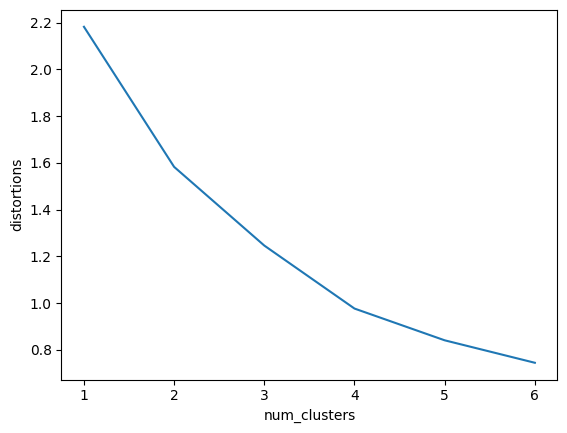

In [90]:
# Perform Elbow analysis to determine the optimal number of clusters for this dataset.

distortions = []
num_clusters = range(1, 7)

for i in num_clusters:
    cluster_centers, distortion = kmeans(penguins_scaled, i)
    distortions.append(distortion)

elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()


In [91]:
# Using the optimal number of clusters obtained from the previous step, run the k-means clustering algorithm
# once more on the preprocessed data.

clusters_center, distortions = kmeans(penguins_scaled, 3)

# Asignar etiquetas de cluster usando vq
cluster_labels, _ = vq(penguins_scaled, clusters_center)

# Añadir etiquetas de cluster al dataframe
penguins_df['cluster_labels'] = cluster_labels


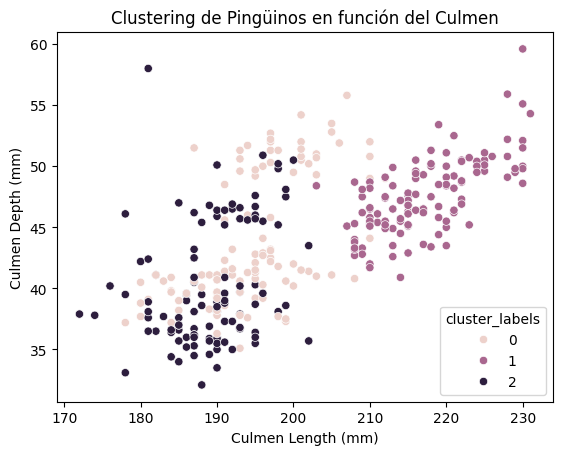

In [92]:
sns.scatterplot(x='flipper_length_mm', y='culmen_length_mm', hue='cluster_labels', data=penguins_df)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Clustering de Pingüinos en función del Culmen')
plt.show()

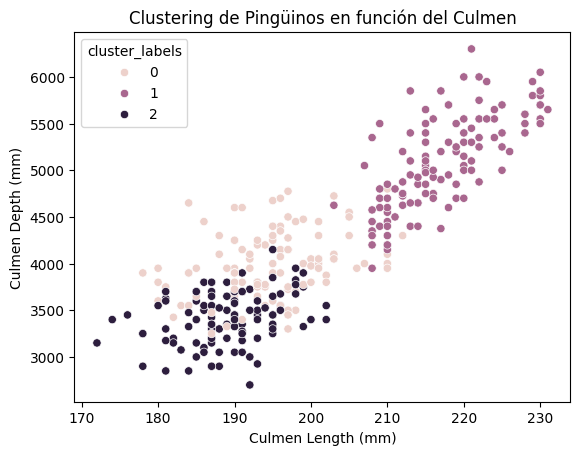

In [93]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='cluster_labels', data=penguins_df)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Clustering de Pingüinos en función del Culmen')
plt.show()

In [94]:
penguins_df['cluster_labels'].unique()

array([0, 2, 1], dtype=int32)

In [95]:
# Create a final characteristic DataFrame for each cluster using the groupby method and mean function
# only on numeric columns.

numeric_columns = penguins_df.select_dtypes(include='number')

stat_penguins = numeric_columns.groupby('cluster_labels').mean()

print(stat_penguins)

                culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
cluster_labels                                                         
0                      43.878302        19.111321         194.764151   
1                      47.568067        14.996639         217.235294   
2                      40.217757        17.611215         189.046729   

                body_mass_g  
cluster_labels               
0               4006.603774  
1               5092.436975  
2               3419.158879  
